In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Stress test of RasaBot

__Framework__: `Locust.io`

__Test parameters__:
* Number of users (clients)
    * *10*, _100_, _500_, _1000_
* Time between requests - _uniform random variable between 2 and 5 seconds_

Total number of tests - 4 (with different user number parameter)

In [2]:
user10_dist = pd.read_csv('./10users_distribution.csv')
user10_reqs = pd.read_csv('./10users_requests.csv')

user100_dist = pd.read_csv('./100users_distribution.csv')
user100_reqs = pd.read_csv('./100users_requests.csv')

user500_dist = pd.read_csv('./500users_distribution.csv')
user500_reqs = pd.read_csv('./500users_requests.csv')

user1000_dist = pd.read_csv('./1000users_distribution.csv')
user1000_reqs = pd.read_csv('./1000users_requests.csv')

In [3]:
user10_dist

,Name,# requests,50%,66%,75%,80%,90%,95%,98%,99%,100%
0,GET /api/messages,241,210,230,260,270,330,410,670,700,1300
1,POST /api/messages,247,210,240,270,290,340,420,600,950,1400
2,Total,488,210,230,260,280,340,420,640,950,1400


In [4]:
user10_reqs

,Method,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s
0,GET,/api/messages,241,7,210,242,17,1268,2516,1.34
1,POST,/api/messages,247,9,210,240,12,1420,43,1.38
2,None,Total,488,16,210,241,12,1420,1264,2.72


In [5]:
user100_reqs

,Method,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s
0,GET,/api/messages,2296,103,290,392,10,2421,2373,12.82
1,POST,/api/messages,2341,99,250,333,15,5275,43,13.08
2,None,Total,4637,202,270,362,10,5275,1196,25.90


In [6]:
user500_reqs

,Method,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s
0,GET,/api/messages,5926,401,4500,4741,4,14217,1206,33.11
1,POST,/api/messages,6244,370,1100,2473,7,11589,42,34.89
2,None,Total,12170,771,3000,3577,4,14217,609,67.99


In [7]:
user1000_reqs

,Method,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s
0,GET,/api/messages,10481,7402,5100,4445,4,21734,129,58.48
1,POST,/api/messages,11148,7277,5100,4421,3,22005,15,62.20
2,None,Total,21629,14679,5100,4432,3,22005,70,120.67


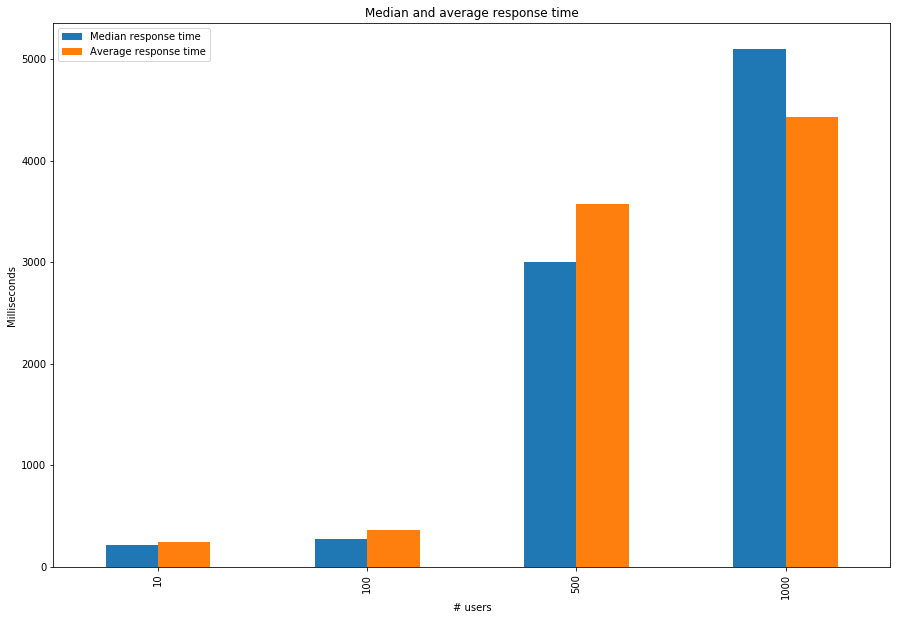

In [17]:
reqs = [['10', user10_reqs.iloc[2]['Median response time'], user10_reqs.iloc[2]['Average response time']], \
        ['100', user100_reqs.iloc[2]['Median response time'], user100_reqs.iloc[2]['Average response time']], \
        ['500', user500_reqs.iloc[2]['Median response time'], user500_reqs.iloc[2]['Average response time']], \
        ['1000', user1000_reqs.iloc[2]['Median response time'], user1000_reqs.iloc[2]['Average response time']]]

reqs = pd.DataFrame(columns=['# users', 'Median response time', 'Average response time'],
                   data=reqs)
reqs.set_index('# users').plot.bar(figsize=(15,10))
plt.title('Median and average response time')
plt.ylabel('Milliseconds')
plt.savefig('ResponseTime.png')

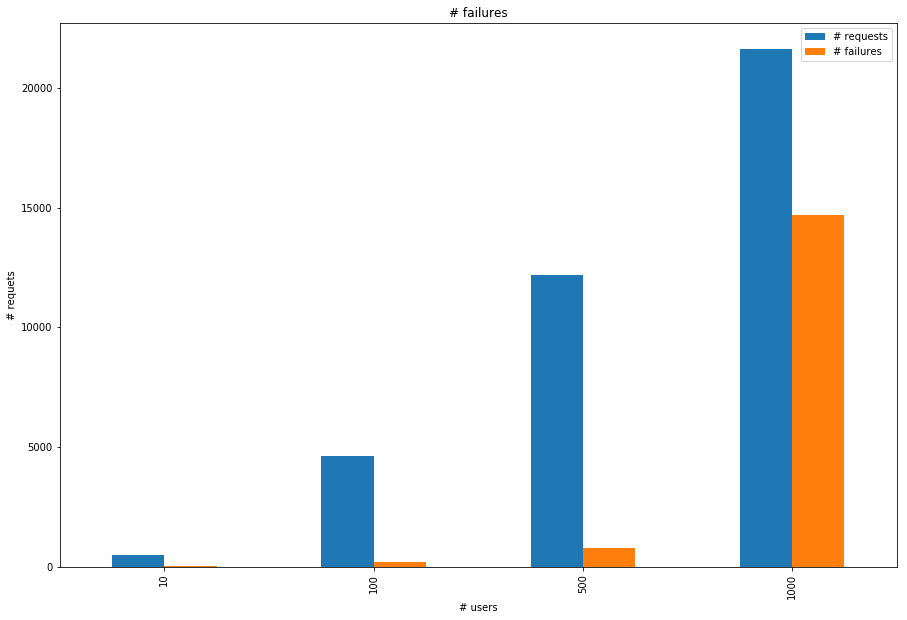

In [16]:
reqs = [['10', user10_reqs.iloc[2]['# requests'], user10_reqs.iloc[2]['# failures']], \
        ['100', user100_reqs.iloc[2]['# requests'], user100_reqs.iloc[2]['# failures']], \
        ['500', user500_reqs.iloc[2]['# requests'], user500_reqs.iloc[2]['# failures']], \
        ['1000', user1000_reqs.iloc[2]['# requests'], user1000_reqs.iloc[2]['# failures']]]

reqs = pd.DataFrame(columns=['# users', '# requests', '# failures'],
                   data=reqs)
reqs.set_index('# users').plot.bar(figsize=(15,10))
plt.title('# failures')
plt.ylabel('# requets')
plt.savefig('Failures.png')